# Hands-on exercise

In this simple example you are required to perform a simple linear regression with scipy. Find all the information on the function in the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [33]:
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model

In [34]:
# Load the provided .csv file with the used car data

#### ---IMPORTING AND CONVERTING TO NP.ARRAY--- ####
filename = "data/km_year_power_price.csv"
lines = csv.reader(open(filename, newline=''), delimiter=',')

dataset = list(lines)
frow = dataset[0]
dataset = np.array( dataset[1:], 'float64')

In [35]:
print(f"Fields: {frow}")

Fields: ['km', 'year', 'powerPS', 'avgPrice']


Use a linear regression to estimate the car prices from the year, kilometers or engine power. 
You can make a simple 1D regression from each one of the parameters independently 




Slope: 1509.0938253352235, Intercept: -3018309.484956963, R-Value: 0.6767043169095447


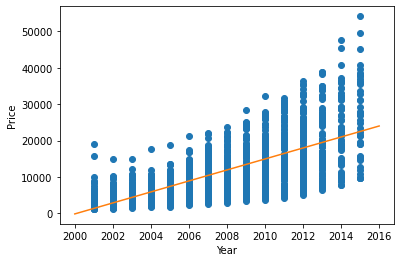

In [36]:
# linear regression with linregress (estimate price from year)


#### ---LINEAR REGRESSION--- ####
slope, intercept, r_value, p_value, std_err = stats.linregress(dataset[:,1], dataset[:,3])
print(f"Slope: {slope}, Intercept: {intercept}, R-Value: {r_value}")



#### ---PLOTTING AND REPRESENTING LINREGRESS AND LSQ OUTPUT--- ####
plt.plot(dataset[:,1], dataset[:,3], 'o')
x = np.linspace(np.max(dataset[:,1])+1, np.min(dataset[:,1])-1, 100)
plt.plot(x, slope*x + intercept)
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()


In [37]:
# linear regression with least squares (estimate price from year)
# You should get exactly the same solution of linregress !


#### ---LINEAR REGRESSION: "MANUAL" MODE--- ####
year=np.array([[1,i] for i in dataset[:,1]])
price=np.array(dataset[:,3])
A = np.dot(np.matrix.transpose(year),year)
year = np.array([ [1,i] for i in dataset[:,1]])
b = np.dot(np.matrix.transpose(year),price)
w = np.dot(np.linalg.inv(A),b)
print(f"Intercept: {w[0]}, Coef: {w[1]}")

Intercept: -3018309.484831333, Coef: 1509.0938252725173


Slope: 90.33080718820236, Intercept: -1303.9126989880006, R-Value: 0.708550031526397


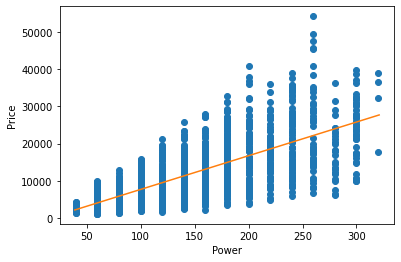

In [38]:
# linear regression with linregress (estimate price from power)


#### ---DEFINING LINREGRESS AND PRINTING RESULTS--- ####
slope_pfp, intercept_pfp, r_value_pfp, p_value_pfp, std_err_pfp = stats.linregress(dataset[:,2], dataset[:,3])
print(f"Slope: {slope_pfp}, Intercept: {intercept_pfp}, R-Value: {r_value_pfp}")



#### ---PLOTTING AND REPRESENTING DATAS--- ####
plt.plot(dataset[:,2], dataset[:,3], 'o')
x = np.linspace(np.max(dataset[:,2])+1, np.min(dataset[:,2])-1, 100)
plt.plot(x, slope_pfp*x + intercept_pfp)
plt.xlabel("Power")
plt.ylabel("Price")
plt.show()

Slope: -0.05425151330972561, Intercept: 16692.345302519734, R-Value: -0.2572867429988496


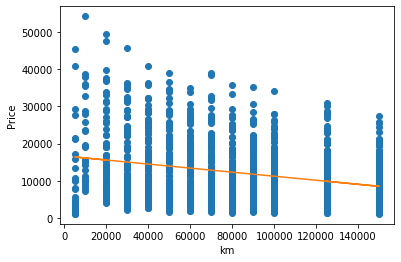

In [39]:
# linear regression with linregress (estimate price from km)


#### ---DEFINING LINREGRESS AND PRINTING RESULTS--- ####
slope_pfk, intercept_pfk, r_value_pfk, p_value_pfk, std_err_pfk = stats.linregress(dataset[:,0], dataset[:,3])
print(f"Slope: {slope_pfk}, Intercept: {intercept_pfk}, R-Value: {r_value_pfk}")



#### ---PLOTTING AND REPRESENTING DATAS--- ####
plt.plot(dataset[:,0], dataset[:,3], 'o')
plt.plot(dataset[:,0], slope_pfk*dataset[:,0] + intercept_pfk)
plt.ylabel("Price")
plt.xlabel("km")
plt.show()

In [40]:
# Have a look at the correlation coefficients to see which of the 3 features works better


#### ---PRINTING CORRELATION COEFFICIENTS--- ####
print(f"r_value from year: {r_value}")
print(f"r_value from power: {r_value_pfp}")
print(f"r_value from km: {r_value_pfk}")



#### ---FINAL CONSIDERATIONS--- ####
print("\nPrice is most correlated with power, but it is also well correlated with the year. Not so much instead with the km")

r_value from year: 0.6767043169095447
r_value from power: 0.708550031526397
r_value from km: -0.2572867429988496

Price is most correlated with power, but it is also well correlated with the year. Not so much instead with the km


In [41]:
# Optional : 2D linear regression with linear model (estimate price from year and power)


#### ---DEFINING A 2-D LIN.REGRESSION MODEL--- ####
linreg = linear_model.LinearRegression()



#### ---FITTING PRICE FROM YEAR AND POWER--- ####
linreg.fit(dataset[:, 1:3], price)



print(f"Intercept: {linreg.intercept_}, Coefs: {linreg.coef_}")

Intercept: -2661196.7867490062, Coefs: [1325.2284004    80.43004469]


In [42]:
# (Optional) linear regression with linear_model.LinearRegression() (estimate price from year)


#### ---DEFINING A LIN.REGRESSION MODEL--- ####
linreg = linear_model.LinearRegression()



#### ---FITTING PRICE FROM YEAR--- ####
linreg.fit(year, price)



#### ---SHOWING RESULTS--- ####
print(f"Intercept: {linreg.intercept_}, Coef: {linreg.coef_}")
#same as before.


Intercept: -3018309.4849569583, Coef: [   0.         1509.09382534]
